In [ ]:
pip install pandas sentence-transformers sklearn matplotlib mxnet
pip install tensorflow-gpu

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# CSV 파일 경로
csv_file_path = "D:\모델실습\r_정보 데이터.csv"
print("csv 가져오기")

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)
print("csv 블러오기")

# "title"과 "synopsis" 열 선택하여 텍스트 데이터로 저장
text_data = df["title"] + " " + df["synopsis"]
print("text_data 저장 ")

# KoBERT 모델 로드
# model = SentenceTransformer('all-MiniLM-L6-v2')

# KoBERT 모델 로드 (1024차원)
model = SentenceTransformer('all-MiniLM-L12-v2')

print(" model  담기 ")

# 텍스트 데이터를 벡터로 변환
vectors = model.encode(text_data, convert_to_tensor=True)

print(" 벡터  텍스트에 담기")

# 벡터의 차원을 256차원으로 변환

#reduced_dim = 256
# pca = PCA(n_components=reduced_dim)
# vectors = pca.fit_transform(vectors)


# K-Means 클러스터링 모델 생성 # 클러스터2개 생성, # 랜덤스테이트 42
kmeans = KMeans(n_clusters=2, random_state=42)
print(" Kmean  클러스터 2개 생성 랜덤스테이트 42")

# 클러스터링 수행
kmeans.fit(vectors)

print(" Kmean에 벡터 학습")

# 클러스터링 결과 확인
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(" 크러러스터 결과확인 ")

# 차원 축소 (2차원으로 표현하기 위해 PCA 사용)
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(vectors)

print(" 벡터 3차원 ") 

# 클러스터별 데이터 개수 계산
cluster_counts = {}
for label in labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# 군집도 시각화
# 피규어 사이즈 10, 10  이상 시 버벅이거나 메모리 부족현상 발생.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(labels):
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], c=label, cmap='viridis')
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], str(label), fontsize=8, ha='center', va='center')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=100, label='Centroids')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Cluster Distribution (3D)')
plt.legend()
plt.show()

c:\Users\SMHRD\anaconda3\envs\cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


csv 가져오기
csv 불러오기
text_data 저장
model 로드
벡터 변환
KMeans 클러스터 2개 생성, 랜덤 스테이트 42
KMeans에 벡터 학습
클러스터 결과 확인


c:\Users\SMHRD\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SMHRD\AppData\Local\Temp\ipykernel_14724\300981062.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], c=cluster_color, cmap='viridis')


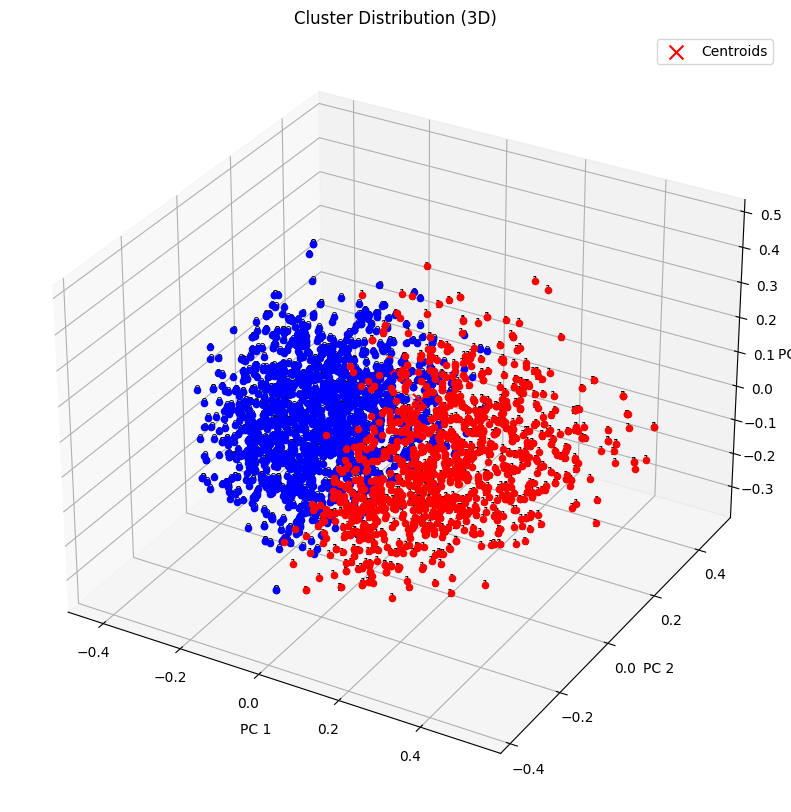

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

# CSV 파일 경로
csv_file_path = "D:\모델실습\로맨스 웹소설 정보 데이터.csv"
print("csv 가져오기")

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)
print("csv 불러오기")

# "title"과 "synopsis" 열 선택하여 텍스트 데이터로 저장
text_data = df["title"] + " " + df["synopsis"]
print("text_data 저장")

# KoBERT 모델 로드 (1024차원)
model = SentenceTransformer('all-MiniLM-L12-v2')
model.to('cuda')
print("model 로드")

# 텍스트 데이터를 벡터로 변환
vectors = model.encode(text_data, convert_to_tensor=True)
vectors = vectors.to('cuda')
print("벡터 변환")

# K-Means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=2, random_state=42)
print("KMeans 클러스터 2개 생성, 랜덤 스테이트 42")

# 클러스터링 수행
kmeans.fit(vectors.cpu().detach().numpy())
print("KMeans에 벡터 학습")

# 클러스터링 결과 확인
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("클러스터 결과 확인")

# 차원 축소 (3차원으로 표현하기 위해 PCA 사용)
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(vectors.cpu().detach().numpy())

# 클러스터별 데이터 개수 계산
cluster_counts = {}
for label in labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# 군집도 시각화
# 클러스터 수 == 넣는 색상 리스트
colors = ['blue', 'red']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(labels):
    cluster_color = colors[label % len(colors)]  # 색상 선택
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], c=cluster_color, cmap='viridis')
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], str(label), fontsize=8, ha='center', va='center')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=100, label='Centroids')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Cluster Distribution (3D)')
plt.legend()
plt.show()
